In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import seaborn as sns

: 

In [ ]:
DATA_DIR = "/nfs/obelix/raid2/alechowicz/ValleyBike/*.csv"
DATA_FILES = glob.glob(DATA_DIR)
# DATA_FILES = ["/nfs/obelix/raid2/alechowicz/ValleyBike/VB_Routes_Data_2018_11_08.csv"]

# load route data
dfs = []
for file in DATA_FILES:
    print(file)
    df = pd.read_csv(file)
    df = df.drop(['User ID'], axis=1, errors='ignore')
    dfs.append(df)

df = pd.concat(dfs)
df = df.dropna()
df = df.loc[df['Date'].str.contains("\+00")]

df["Date"] = pd.to_datetime(df["Date"])
df.sort_values(by='Date')

print(len(df))

In [17]:
trips = pd.read_csv("tripsAugmented.csv", converters={'full_route': lambda x: x[1:-1].replace("(", "").split('),')})

trips["start_time"] = pd.to_datetime(trips["start_time"])
trips["duration"] = pd.to_timedelta(trips["duration"])
deltaF = datetime.timedelta(minutes=1) # filter out trips which take less than 1 min
deltaC = datetime.timedelta(hours=24) # filter out trips which take longer than a day
trips = trips.loc[trips['duration'] > deltaF]
trips = trips.loc[trips['duration'] < deltaC]

timeRange = trips["start_time"].to_list()

display(trips)

,Unnamed: 0,id,start_station,start_city,end_station,end_city,start_time,duration,full_route
0,0,route_10_2020@a2a17c30-d848-4ded-94f0-bd8ae05a...,Main Street-Bridge Street,Northampton,Florence Center,Northampton,2020-10-06 12:37:36+00:00,0 days 00:17:25,"[(42.3205, -72.62829, (42.3205, -72.62829, (..."
1,1,route_10_2020@5b2f37e6-e06a-43ae-949e-b2ffd2de...,Village Hill-State Hospital,Northampton,Village Hill-State Hospital,Northampton,2020-10-06 12:42:02+00:00,0 days 00:41:35,"[(42.312061666666665, -72.64750833333333, (42..."
2,2,route_10_2020@c74f25cd-e0c6-4fe7-9a2f-7e31324f...,Florence Center,Northampton,Florence Center,Northampton,2020-10-06 12:44:47+00:00,0 days 00:49:40,"[(42.334898333333335, -72.66787166666667, (42..."
3,3,route_10_2020@ff5d4317-b149-42a4-bc5e-9bc101da...,YMCA-Childs Park,Northampton,John M Greene Hall-Smith College,Northampton,2020-10-06 12:49:30+00:00,0 days 00:06:00,"[(42.328588333333336, -72.64399166666666, (42..."
4,4,route_10_2020@2b54f8e3-ed53-48ab-b065-43d59144...,Jackson Street,Northampton,State St-Mass Central Rail Trail,Northampton,2020-10-06 12:58:39+00:00,0 days 00:24:25,"[(42.337208333333336, -72.64266, (42.33720833..."
...,...,...,...,...,...,...,...,...,...
166283,166283,route_06_2022@9f9c149d-b8af-4d43-8882-5b6d7cb9...,Amherst Town Hall,Amherst,University Drive,Amherst,2022-06-07 02:20:55+00:00,0 days 00:07:00,"[(42.37551, -72.51947333333334, (42.37551, -7..."
166284,166284,route_06_2022@aa343271-8410-440e-9329-f8fa76ad...,University Drive,Amherst,University Drive,Amherst,2022-06-07 02:29:10+00:00,0 days 00:10:00,"[(42.36831166666666, -72.53333, (42.368311666..."
166285,166285,route_06_2022@42643acc-7592-4aa7-aff1-b667a2e3...,Mackenzie Field,Holyoke,Holyoke Medical Center Station,Holyoke,2022-06-07 02:34:58+00:00,0 days 00:07:45,"[(42.20183333333333, -72.619915, (42.20183333..."
166286,166286,route_06_2022@39cbaf9d-d9eb-460c-8f4d-f16ea151...,El Corazon,Holyoke,South Holyoke,Holyoke,2022-06-07 02:47:24+00:00,0 days 00:28:00,"[(42.20078, -72.60606333333334, (42.20078, -7..."


In [18]:
routesDict = {}
for index, row in trips.iterrows():
    ID = row['id']
    time = row['start_time']
    locations = row['full_route']
    duration = row['duration']
    routesDict[ID] = {"locations": locations, "start_time": time, "duration": duration}


In [31]:
import random
routeID = random.choice(list(routesDict.keys()))
print(routeID)

route_06_2021@a09a430d-bd7e-4775-b3e5-650b7efebdfb


-72.52938 42.37556166666667 -72.51698833333333 42.40358833333333
route_06_2021@a09a430d-bd7e-4775-b3e5-650b7efebdfb: start time: 2021-06-15 23:04:10+00:00, duration: 0 days 00:19:50


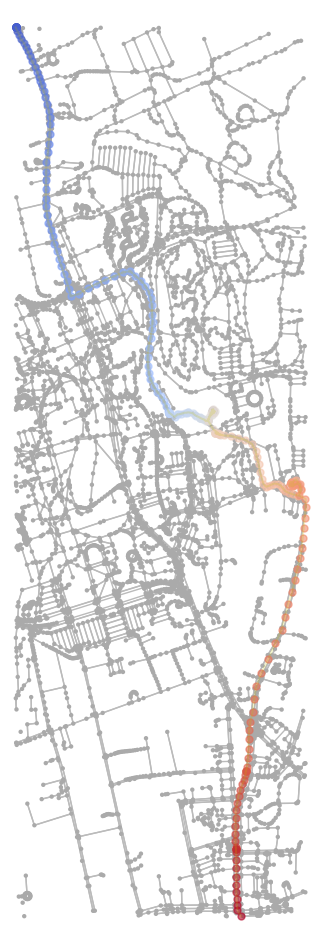

In [32]:
import pandas as pd
import numpy as np
import math
import osmnx as ox
import networkx as nx
import pickle
from time import time
import time
from xml.dom import NotFoundErr
import itertools
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import osmnx.geometries as gx
import numpy as np
import math

route = routesDict[routeID]
locationList = [x[1:].replace("(", "").replace(")", "").split(',') for x in route["locations"]]
for tuple in locationList:
    tuple[0] = float(tuple[0])
    tuple[1] = float(tuple[1])
startTime = route["start_time"]
duration = route["duration"]

pointsList = []
for (lat, long) in locationList:
    pointsList.append(Point(long, lat))

# convert to GeoDataFrame (enables next step)
points = gpd.GeoSeries(pointsList, crs='epsg:4326')
gpd = gpd.GeoDataFrame({'geometry': pointsList})

minx, miny, maxx, maxy = gpd.geometry.total_bounds
print(minx, miny, maxx, maxy)
print("{}: start time: {}, duration: {}".format(routeID, startTime, duration))
if (minx == maxx) and (miny == maxy):
    print("invalid route!")
else:
    G = ox.graph_from_bbox(miny, maxy, minx, maxx, simplify=False, retain_all=True)

    # project to CRS (coordinate reference system) used by the projected graph (this is for accuracy)
    pointsProg = points.to_crs(G.graph['crs'])

fig, ax = ox.plot_graph(
    G, bgcolor="w", node_color="#AAAAAA", figsize=(20, 12), node_size=10, edge_linewidth=1, edge_color="#BBBBBB", show=False, save=False, close=False
)

cmap = plt.cm.get_cmap('coolwarm',len(pointsProg))
colors = list(cmap(np.arange(len(pointsProg))))
colors[0] = "#000000"
pointsX = []
pointsY = []
for i, point in enumerate(pointsProg):
    pointsX.append(point.x)
    pointsY.append(point.y)
    ax.scatter(point.x, point.y, color=colors[i], s = 25, alpha = 0.6)
ax.plot(pointsX, pointsY, c="y", alpha = 0.2)

extent = ax.bbox.transformed(fig.dpi_scale_trans.inverted())
plt.draw()
plt.show()